### Evaluation Task

##### https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link
##### 한국 아파트 가격 예측

In [1]:
import pandas as pd
apart_df = pd.read_csv('./datasets/korean_apart.csv', low_memory=False)
apart_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [2]:
apart_df.duplicated().sum()

283930

In [3]:
apart_df = apart_df.drop_duplicates()
apart_df.duplicated().sum()

0

In [4]:
apart_df.isna().sum()

지역코드      0
동         0
거래일       0
아파트       0
지번      428
전용면적      0
층         0
건축년도     47
거래금액      0
dtype: int64

In [5]:
apart_df = apart_df[~apart_df.지번.isna()]
apart_df = apart_df[~apart_df.건축년도.isna()]
apart_df.isna().sum()

지역코드    0
동       0
거래일     0
아파트     0
지번      0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64

In [6]:
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718434 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    object 
dtypes: float64(3), object(6)
memory usage: 360.0+ MB


In [7]:
apart_df.거래금액 = apart_df.거래금액.apply(lambda x: int(x.replace(',', '')))
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718434 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 360.0+ MB


In [8]:
apart_df.건축년도 = apart_df.건축년도.astype('int16')
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718434 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int16  
 8   거래금액    int64  
dtypes: float64(2), int16(1), int64(1), object(5)
memory usage: 333.0+ MB


In [9]:
for column in apart_df.columns:
    print('{}: {}'.format(column, (apart_df[column] == ' ').sum()))

지역코드: 0
동: 0
거래일: 0
아파트: 0
지번: 0
전용면적: 0
층: 1
건축년도: 0
거래금액: 0


In [10]:
apart_df = apart_df[apart_df.층 != ' ']
print((apart_df.층 == ' ').sum())

0


In [11]:
apart_df.층 = apart_df.층.astype('float16')
apart_df.층 = apart_df.층.astype('int16')
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718433 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       int16  
 7   건축년도    int16  
 8   거래금액    int64  
dtypes: float64(2), int16(2), int64(1), object(4)
memory usage: 306.0+ MB


In [12]:
apart_df = apart_df.drop(columns='지역코드', axis=1)
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718433 entries, 0 to 5002838
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   동       object 
 1   거래일     object 
 2   아파트     object 
 3   지번      object 
 4   전용면적    float64
 5   층       int16  
 6   건축년도    int16  
 7   거래금액    int64  
dtypes: float64(1), int16(2), int64(1), object(4)
memory usage: 270.0+ MB


In [13]:
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...
5002834,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019,19500
5002835,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999,21700
5002836,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000,9300
5002837,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003,25500


In [14]:
apart_df.거래일 = apart_df.거래일.apply(lambda date: date.split(' ')[0])
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,학성동,5/30/2020,남운학성타운,379,135.5800,8,1991,26700
1,남외동,1/3/2020,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,남외동,1/3/2020,에일린의뜰,500,84.9920,11,2007,36500
3,남외동,1/3/2020,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,남외동,1/4/2020,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...
5002834,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,57.1300,6,2019,19500
5002835,동홍동,2023-07-04,주공5차(동홍5차),1674,49.8700,2,1999,21700
5002836,서홍동,2023-07-04,서홍반석타운,2004-1,45.3100,1,2000,9300
5002837,중문동,2023-07-01,중문푸른마을,1789,51.8800,2,2003,25500


In [15]:
# 날짜 형식 맞추기
def change_to_year_first(date):
    if '/' in date:
        month, day, year = date.split('/')
        if(int(day) < 10):
            day = '0' + day
        if(int(month) < 10):
            month = '0' + month
        
        return f'{year}-{month}-{day}'
    return date

apart_df.거래일 = apart_df.거래일.apply(lambda date: change_to_year_first(date))
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,학성동,2020-05-30,남운학성타운,379,135.5800,8,1991,26700
1,남외동,2020-01-03,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,남외동,2020-01-03,에일린의뜰,500,84.9920,11,2007,36500
3,남외동,2020-01-03,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,남외동,2020-01-04,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...
5002834,대정읍 하모리,2023-06-29,더그라벨아파트,1221-1,57.1300,6,2019,19500
5002835,동홍동,2023-07-04,주공5차(동홍5차),1674,49.8700,2,1999,21700
5002836,서홍동,2023-07-04,서홍반석타운,2004-1,45.3100,1,2000,9300
5002837,중문동,2023-07-01,중문푸른마을,1789,51.8800,2,2003,25500


<Axes: >

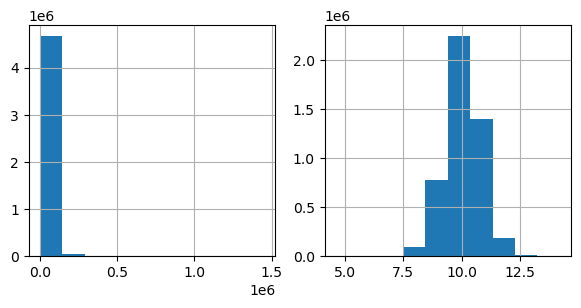

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
apart_df.거래금액.hist(ax=ax[0])
np.log1p(apart_df.거래금액).hist(ax=ax[1])

In [17]:
display(apart_df.거래금액.groupby(by=apart_df.거래일).sum().reset_index().sort_values(by='거래금액', ascending=False))
display(apart_df.거래금액.groupby(by=apart_df.거래일).count().reset_index().sort_values(by='거래금액', ascending=False))

,거래일,거래금액
1990,2020-06-13,408500653
1993,2020-06-16,399841068
2011,2020-07-04,337005319
2004,2020-06-27,305881768
1992,2020-06-15,304265717
...,...,...
2455,2021-09-21,167500
2586,2022-01-30,149000
2234,2021-02-12,128900
2589,2022-02-02,67000


,거래일,거래금액
1990,2020-06-13,9811
1993,2020-06-16,9642
1871,2020-02-15,8476
1992,2020-06-15,8154
2011,2020-07-04,7822
...,...,...
2234,2021-02-12,2
2455,2021-09-21,2
2586,2022-01-30,2
2588,2022-02-01,1


/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/Users/viceliln/Desktop/KDT_0900_Cho/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.

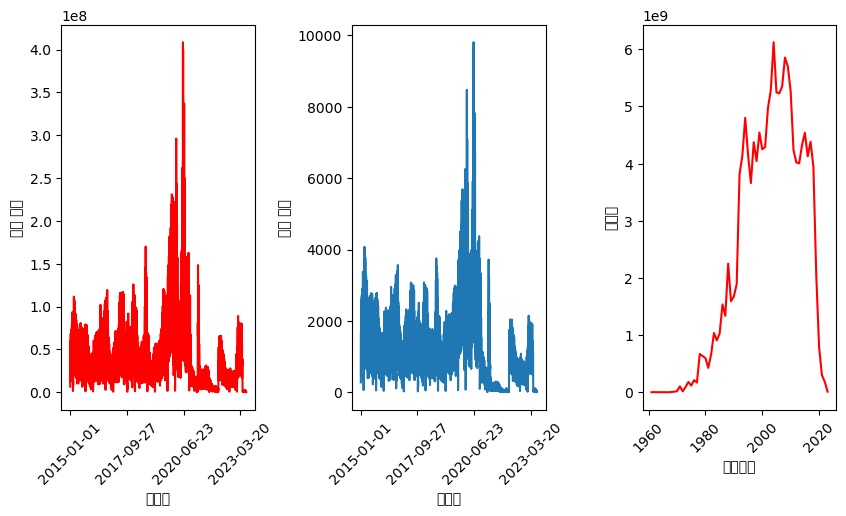

In [18]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
plt.rc('font', family='Malgun Gothic')
apart_df.거래금액.groupby(by=apart_df.거래일).sum().plot(ax=ax[0], rot=45, ylabel='거래 금액', c='red')
apart_df.거래금액.groupby(by=apart_df.거래일).count().plot(ax=ax[1], rot=45, ylabel='거래 건수')
apart_df.거래금액.groupby(by=apart_df.건축년도).sum().plot(ax=ax[2], rot=45, ylabel='거래량', c='red')
plt.subplots_adjust(wspace=0.5)

In [19]:
apart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4718433 entries, 0 to 5002838
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   동       object 
 1   거래일     object 
 2   아파트     object 
 3   지번      object 
 4   전용면적    float64
 5   층       int16  
 6   건축년도    int16  
 7   거래금액    int64  
dtypes: float64(1), int16(2), int64(1), object(4)
memory usage: 270.0+ MB


In [20]:
apart_df[apart_df.아파트 == '(1-102)']

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
2144250,명륜3가,2019-05-10,(1-102),1-102,26.64,4,1997,7500
2144251,명륜3가,2019-05-10,(1-102),1-102,33.33,4,1997,8800
2144252,명륜3가,2019-05-10,(1-102),1-102,26.64,3,1997,7500
2144253,명륜3가,2019-05-10,(1-102),1-102,33.33,3,1997,8700
2823647,명륜3가,2016-07-30,(1-102),1-102,70.05,1,1997,19000
2823973,명륜3가,2016-11-28,(1-102),1-102,70.05,1,1997,19000


In [21]:
from sklearn.preprocessing import LabelEncoder

encoders = []
columns = ['동', '거래일', '아파트', '지번']

for column in columns:
    encoder = LabelEncoder()
    encoded_feature = encoder.fit_transform(apart_df[column])
    apart_df[column] = encoded_feature
    encoders.append(encoder)
    print(encoder.classes_)

['가경동' '가곡동' '가남읍 신해리' ... '흥해읍 초곡리' '흥해읍 학성리' '흥해읍 학천리']
['2015-01-01' '2015-01-02' '2015-01-03' ... '2023-07-05' '2023-07-06'
 '2023-07-07']
['(1-102)' '(1018-8)' '(1028-0)' ... '힐하우스' '힐하우스(577-79)' '힐하우스(802-3)']
['1' '1-1' '1-10' ... '지구BL 5' '지구BL 7' '지구BL 8']


In [22]:
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,2977,1976,5204,9805,135.5800,8,1991,26700
1,447,1828,5193,12119,101.6000,2,2006,35500
2,447,1828,22332,12037,84.9920,11,2007,36500
3,447,1828,5193,12119,118.7060,8,2006,43000
4,447,1829,5194,12051,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...
5002834,657,3101,7675,1954,57.1300,6,2019,19500
5002835,814,3106,28184,4586,49.8700,2,1999,21700
5002836,1436,3106,17120,5944,45.3100,1,2000,9300
5002837,2566,3103,28524,5091,51.8800,2,2003,25500


In [23]:
from sklearn.preprocessing import StandardScaler

columns = apart_df.columns[:-1]
for column in columns:
    apart_df[f'스케일_{column}'] = StandardScaler().fit_transform(apart_df[[column]])

In [24]:
columns = apart_df.columns[:-1]
for coulmn in columns:
    apart_df = apart_df[apart_df[f'스케일_{column}'].between(-1.96, 1.96)]
    
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,스케일_동,스케일_거래일,스케일_아파트,스케일_지번,스케일_전용면적,스케일_층,스케일_건축년도
0,2977,1976,5204,9805,135.5800,8,1991,26700,1.524047,0.795326,-1.337078,0.016560,2.297819,-0.178437,-1.123715
1,447,1828,5193,12119,101.6000,2,2006,35500,-1.299184,0.610148,-1.338132,0.420165,0.997085,-1.132354,0.473834
2,447,1828,22332,12037,84.9920,11,2007,36500,-1.299184,0.610148,0.303428,0.405862,0.361341,0.298522,0.580337
3,447,1828,5193,12119,118.7060,8,2006,43000,-1.299184,0.610148,-1.338132,0.420165,1.651892,-0.178437,0.473834
4,447,1829,5194,12051,84.9636,7,2007,38700,-1.299184,0.611400,-1.338036,0.408304,0.360254,-0.337423,0.580337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002833,657,3074,7675,1954,57.1300,3,2019,18500,-1.064845,2.169144,-1.100408,-1.352799,-0.705199,-0.973367,1.858376
5002834,657,3101,7675,1954,57.1300,6,2019,19500,-1.064845,2.202926,-1.100408,-1.352799,-0.705199,-0.496409,1.858376
5002835,814,3106,28184,4586,49.8700,2,1999,21700,-0.889648,2.209182,0.863928,-0.893729,-0.983107,-1.132354,-0.271689
5002836,1436,3106,17120,5944,45.3100,1,2000,9300,-0.195557,2.209182,-0.195773,-0.656869,-1.157661,-1.291340,-0.165186


In [25]:
apart_df = apart_df.drop(columns=apart_df.iloc[:, 8:].columns, axis=1)
apart_df

,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,2977,1976,5204,9805,135.5800,8,1991,26700
1,447,1828,5193,12119,101.6000,2,2006,35500
2,447,1828,22332,12037,84.9920,11,2007,36500
3,447,1828,5193,12119,118.7060,8,2006,43000
4,447,1829,5194,12051,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...
5002833,657,3074,7675,1954,57.1300,3,2019,18500
5002834,657,3101,7675,1954,57.1300,6,2019,19500
5002835,814,3106,28184,4586,49.8700,2,1999,21700
5002836,1436,3106,17120,5944,45.3100,1,2000,9300


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def get_evaluation(y_test, prediction):
    MAE =  mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)

    print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'.format(MAE, MSE, RMSE, MSLE, RMSLE, R2))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

features, targets = apart_df.iloc[:, :-1], apart_df.거래금액

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



# 로그 변환
y_train = np.log1p(y_train)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

X_test = StandardScaler().fit_transform(X_test)

prediction = linear_regression.predict(X_test)

get_evaluation(np.log1p(y_test), prediction)

MAE: 0.4457, MSE: 0.3305, RMSE: 0.5749, MSLE: 0.0028, RMSLE: 0.0525, R2: 0.4007


In [28]:
print(np.expm1(linear_regression.predict(scaler.transform(pd.DataFrame([[2977, 1976, 5204, 9805, 135.5800, 8, 1991]], columns=features.columns)))))
print(np.expm1(linear_regression.predict(scaler.transform(pd.DataFrame([[447, 1828, 5193, 12119,118.7060,8,2006]], columns=features.columns)))))
# 26700
# 43000

# [49079.14073835]
# [47936.25105078]

[45932.32281916]
[46858.445006]
